# [IAPR 2018:][iapr2018] Lab 3 ‒  Classification

**Author:** Bryce Burgess and Ibrahim Youssef  
**Due date:** 25.05.2018

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [21]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

((200L, 2L), (200L, 2L), (200L, 2L))


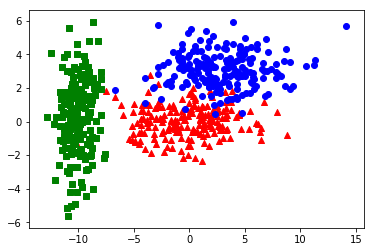

In [22]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

plt.scatter(a[:,0], a[:,1], c='r', marker='^')
plt.scatter(b[:,0], b[:,1], c='b', marker='o')
plt.scatter(c[:,0], c[:,1], c='g', marker='s')
plt.show()

### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

We used sklearn's linear discriminant analysis method, and applied it to every combination of classes within the data, to try and find the most effective linear classifiers. We also wanted to do a quadratic classifier, but were unable to find the coefficients in the sklearn method, so it wasn't plottable.

Additionally, we took a point by point analysis to see which points would be grouped where and how the data was grouped, by taking the distance from the mean while accounting for covariance.

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import pylab as pl

def plot_lin_models(model, data1, data2, data3 = np.empty((0,0)), title=''):
    plt.scatter(data1[:,0], data1[:,1], c="r", marker="^")
    plt.scatter(data2[:,0], data2[:,1], c="b", marker="o")
    if data3.any():
        plt.scatter(data3[:,0], data3[:,1], c="g", marker="s")
    
    for i in range(len(model.coef_)):
        x = [ int( np.floor(min( min(a[:,0]), min(b[:,0]), min(c[:,0])) )) ]
        x.append( int( np.ceil(max(  max(a[:,0]), max(b[:,0]), max(c[:,0])) )) )
        
        y = [ x[0]*float(model.coef_[i][1]) + float(model.coef_[i][0]) ]
        y.append( x[1]*float(model.coef_[i][1]) + float(model.coef_[i][0]) )

        plt.gca().set_title(title)
        plt.plot(x, y)

# all three labeled data sets
data_all = np.vstack((a,b,c))
labels_all = np.transpose( tuple([["a"]*len(a) + ["b"]*len(b) + ["c"]*len(c)]) )

linear_model1 = lda(solver='lsqr')
linear_model1.fit(data_all, labels_all.ravel())
linear_model1.coef_ # what is the order of coefs? why 3 lines?
errors1 = linear_model1.score(data_all, labels_all)
print linear_model1.coef_

# separate a from b
data_ab = np.vstack((a,b))
labels_ab = np.transpose( tuple([["a"]*len(a) + ["b"]*len(b)]) )

linear_model2 = lda(solver='lsqr')
linear_model2.fit(data_ab, labels_ab.ravel())
linear_model2.coef_ # what is the order of coeffs? why are there 3?
errors2 = linear_model2.score(data_ab, labels_ab)
print linear_model2.coef_

# separate a from c
data_ac = np.vstack((a,c))
labels_ac = np.transpose( tuple([["a"]*len(a) + ["c"]*len(c)]) )

linear_model3 = lda(solver='lsqr')
linear_model3.fit(data_ac, labels_ac.ravel())
linear_model3.coef_ # what is the order of coeffs? why are there 3?
errors3 = linear_model3.score(data_ac, labels_ac)
print linear_model3.coef_

# separate b from c
data_bc = np.vstack((b,c))
labels_bc = np.transpose( tuple([["b"]*len(b) + ["c"]*len(c)]) )

linear_model4 = lda(solver='lsqr')
linear_model4.fit(data_bc, labels_bc.ravel())
linear_model4.coef_ # what is the order of coeffs? why are there 3?
errors4 = linear_model4.score(data_bc, labels_bc)
print linear_model4.coef_

# separate a from b and c
data_a = np.vstack((a,b,c))
labels_a = np.transpose( tuple([["a"]*len(b) + ["xa"]*len(b) + ["xa"]*len(c)]) )

linear_model5 = lda(solver='lsqr')
linear_model5.fit(data_a, labels_a.ravel())
linear_model5.coef_ # what is the order of coeffs? why are there 3?
errors5 = linear_model5.score(data_a, labels_a)
print linear_model5.coef_

# separate b from a and c
data_b = np.vstack((a,b,c))
labels_b = np.transpose( tuple([["xb"]*len(b) + ["b"]*len(b) + ["xb"]*len(c)]) )

linear_model6 = lda(solver='lsqr')
linear_model6.fit(data_b, labels_b.ravel())
linear_model6.coef_ # what is the order of coeffs? why are there 3?
errors6 = linear_model6.score(data_b, labels_b)
print linear_model6.coef_

# separate c from a and b
data_c = np.vstack((a,b,c))
labels_c = np.transpose( tuple([["xc"]*len(a) + ["xc"]*len(b) + ["c"]*len(c)]) )

linear_model7 = lda(solver='lsqr')
linear_model7.fit(data_c, labels_c.ravel())
linear_model7.coef_ # what is the order of coeffs? why are there 3?
errors7 = linear_model7.score(data_c, labels_c)
print linear_model7.coef_


plt.subplot(331)
plot_lin_models(linear_model1, a,b,c, title="linear_model1")
plt.subplot(334)
plot_lin_models(linear_model2, a,b, title="sep a from b")
plt.subplot(335)
plot_lin_models(linear_model3, a,c, title="sep a from c")
plt.subplot(336)
plot_lin_models(linear_model4, b,c, title="sep b from c")
plt.subplot(337)
plot_lin_models(linear_model5, a,b,c, title="a from b and c")
plt.subplot(338)
plot_lin_models(linear_model6, a,b,c, title="b from a and c")
plt.subplot(339)
plot_lin_models(linear_model7, a,b,c, title="c from a and b")
plt.show()

[[-0.03033432  0.01638385]
 [ 0.36396584  1.36051736]
 [-1.43825028  0.22154329]]
[[ 0.25158385  3.11859655]]
[[-1.80614328  0.19037412]]
[[-2.28969919 -0.81882274]]
[[-0.26610843  0.926765  ]]
[[-0.35042498 -1.35052694]]
[[ 1.38617752 -0.27926383]]


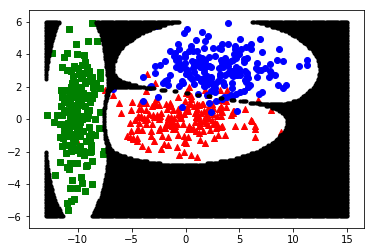

In [24]:
################ Gaussian Regions ##################

x_max = int( np.ceil( max( max(a[:,0]), max(b[:,0]), max(c[:,0]))  ) )
x_min = int( np.floor( min( min(a[:,0]), min(b[:,0]), min(c[:,0])) ) )
y_max = int( np.ceil( max( max(a[:,1]), max(b[:,1]), max(c[:,1]))  ) )
y_min = int( np.floor( min( min(a[:,1]), min(b[:,1]), min(c[:,1])) ) )

def gaussian(mean, std, x):
    return 1/(std * np.sqrt(2*np.pi)) * np.exp(-0.5*( (mean-x)/std) **2) 

a_mean = np.mean(a, axis = 0)
a_std = np.std(a, axis = 0)
np.sqrt( np.cov(a[:,0], a[:,1]) )

b_mean = np.mean(b, axis = 0)
b_std = np.std(b, axis = 0)
np.sqrt( np.cov(b[:,0], b[:,1]) )

c_mean = np.mean(c, axis = 0)
c_std = np.std(c, axis = 0)
np.sqrt( np.cov(c[:,0], c[:,1]) )

separation_pts_x = []
separation_pts_y = []

thresh = 0.0005
resolution = 0.1
for x in pl.frange(x_min, x_max, resolution):
    for y in pl.frange(y_min, y_max, resolution):
        a_prob = gaussian(a_mean[0], a_std[0], x) * gaussian(a_mean[1], a_std[1], y)
        b_prob = gaussian(b_mean[0], b_std[0], x) * gaussian(b_mean[1], b_std[1], y)
        c_prob = gaussian(c_mean[0], c_std[0], x) * gaussian(c_mean[1], c_std[1], y)
    
        if (a_prob <= b_prob and a_prob <= c_prob):# something wrong here
            if abs(b_prob-c_prob) < thresh:
                separation_pts_x.append(x)
                separation_pts_y.append(y)
        
        if (c_prob <= a_prob and c_prob <= b_prob):
            if ((abs(a_prob-b_prob) < thresh) >= c_prob):
                separation_pts_x.append(x)
                separation_pts_y.append(y) 
                
        if (b_prob <= a_prob and b_prob <= c_prob):
            if ((abs(a_prob-c_prob) < thresh) >= b_prob):
                separation_pts_x.append(x)
                separation_pts_y.append(y)
                
plt.scatter(a[:,0], a[:,1], c="r", marker="^")
plt.scatter(b[:,0], b[:,1], c="b", marker="o")
plt.scatter(c[:,0], c[:,1], c="g", marker="s")
plt.scatter(separation_pts_x, separation_pts_y, c="k", marker=".")
plt.show()

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

The mahalanobis distance measures the distance from the mean, while accounting for the fact that the variance can change in the different directions of the data space. We constructed a sample space for testing the mahalanobis distance classifier by choosing the number of points that we wanted from the region where data was present, and then classified all of these points to get a sense for how the classifier would behave for any data point.

We used the package from scipy to do the calculation

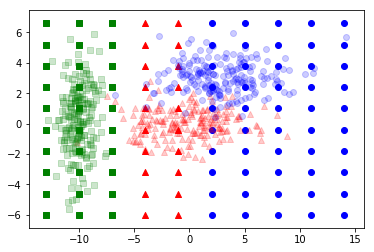

In [25]:
from scipy.spatial.distance import mahalanobis as mln

##### Calculations ######
def mahalanobis_dist(x, data): # point(s) to check, single class data
    mean = np.mean(data, axis = 0)
    cov = np.cov(np.transpose(data))
    VI = np.linalg.inv(cov)
    md = []
    
    for i in range(len(x)):
        md.append( mln( mean, x[i], VI) ) 
    #mdalt = []
    #for i in range(len(x)):
     #   mdalt.append(np.dot(np.dot(mean, VI), np.transpose(x[i])))
        
    return md
    #return mdalt

def mahalanobis_classifier(x, data1, data2, data3):
    class1_pts = []
    class2_pts = []
    class3_pts = []

    for i in range(len(x)):
        md1 = mahalanobis_dist(x[i], data1)
        md2 = mahalanobis_dist(x[i], data2)
        md3 = mahalanobis_dist(x[i], data3) 
    
        if   min(md1, md2, md3) == md1:
            class1_pts.append(x[i])
            #print x[i], "red"
            
        elif min(md1, md2, md3) == md2:
            class2_pts.append(x[i])
            #print x[i], "blue"
            
        elif min(md1, md2, md3) == md3:
            class3_pts.append(x[i])
            #print x[i], "green"
            
    class1_pts = np.asarray(class1_pts)
    class2_pts = np.asarray(class2_pts)
    class3_pts = np.asarray(class3_pts)

    return [class1_pts.T, class2_pts.T, class3_pts.T]


##### Create Sample Region #####
n_sample_points = 100
sample_x_resolution = (float(x_max+1)-float(x_min-1))/np.sqrt(n_sample_points)
sample_y_resolution = (float(y_max+1)-float(y_min-1))/np.sqrt(n_sample_points)

sample_region = np.zeros((n_sample_points, 2))
i=0
for j in pl.frange(x_min, x_max, sample_x_resolution):
    for k in pl.frange(y_min, y_max, sample_y_resolution):
        sample_region[i] = (j,k)
#        print i
        i+=1

##### Classify and Plot ######
sample_classified = mahalanobis_classifier(sample_region, a, b, c) 

plt.scatter(sample_classified[0][0], sample_classified[0][1], c="r", marker="^")
plt.scatter(sample_classified[1][0], sample_classified[1][1], c="b", marker="o")
plt.scatter(sample_classified[2][0], sample_classified[2][1], c="g", marker="s")

plt.scatter(a[:,0], a[:,1], c="r", marker="^", alpha=.2)
plt.scatter(b[:,0], b[:,1], c="b", marker="o", alpha=.2)
plt.scatter(c[:,0], c[:,1], c="g", marker="s", alpha=.2)
plt.show()

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [3]:
import gzip

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [4]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

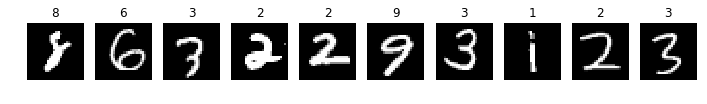

In [5]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)
plt.show()

### 2.2 MLP
Neural networks are an interesting and powerful tool in machine learning. Analogous to how biological neurons work, artificial neurons are discrete units that take inputs, and generate outputs. The neurons "fire" when a certain input threshold is exceeded. A solitary neuron with two inputs is able to perform simple logic functions, such as implementing AND/OR gates. However, much more complex processes can be realized by *layering* and interconnecting neurons to form complex neural networks. 

The classifier that we have implemented in this section, the multilayer perceptron (MLP), is a neural network. We shall see that with this classifier we were able to correctly classify different numbers with a high degree of accuracy.

#### Data Pre-processing

Prior to training our MLP, it was necessary to perform a few pre-processing steps. Each input image to be classified is represented as a 28 x 28 matrix. Our algorithm began by flattening each image into a 1D array of size 784. This converted the input into a format that was compatible with the MLP.

The next step was to normalize all of the data to have a mean of 0, and a variance of 1. In order for this process to make sense, it was important to scale the testing and training data *identically.* A scaler was determined by first normalizing the training data. Once this was done, the **same** scaler was applied on the test set. 

In [6]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Create lists to store the flattened values of the images.
train_data = np.empty((train_set_size,image_shape[0]*image_shape[1]))
test_data = np.empty((test_set_size,image_shape[0]*image_shape[1]))

# Flatten the input matrices into 784 x 1 lists
for i in range(0, train_set_size): train_data[i] = np.ravel(train_images[i])
for i in range(0, test_set_size): test_data[i] = np.ravel(test_images[i])
    
# Pre-process the data by developing a scaler such that the training data has a mean of 0 and standard deviation of 1.
scaler = StandardScaler()
scaler.fit(train_data)

# Scale the training and testing data using the same scale for both.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

#### Building the MLP and Tuning Hyperparameters

In order to construct our MLP, we specified a number of the model's hyperparameters. This was done using a 3-fold cross validation to identify the optimal hyperparameters for the model. One parameter that was not modifed was the number of hidden units, which was specified to be 100 in the problem description.

* **L2 Regularization (Alpha)**

   *L2 Regularization is a technique that allows our model to avoid overfitting by penalizing large weights within the classifier's weight vector. This still allows the model fitting to compute the weight vector that best separates the various classes, but gives the resulting MLP a better ability to generalize.*


* **Solver**
   
   *Another hyperparameter was the training algorithm used to compute the weights. Our tuning process identified whether we should use the Adam, or the L-BFGS method.*
   

* **Activation Function**

   *The final hyperparameter that we considered in the optimization is the choice of activation function. The tuning process selected between a rectified linear unit function, hyperbolic tan function, logistic sigmoid function, and the identity function (which is simply the sum of the weighted inputs minus threshold).*


**The optimal hyperparameters were identified to be**

* Alpha: 0.10000000000000001

* Activation Function: rectified linear unit function

* Solver: adam

In [7]:
from sklearn.model_selection import GridSearchCV

# Specify the properties of the MLP's hidden layer(s). The number of hidden units (h) should be 100
h = (100,)

# L2 regularization is used to reduce over-fitting. Optimal value to be determined via cross-validation on the training set.
regularization_options = 10.0 ** -np.arange(1, 7)

# There are various methods to algorithmically tune the weights of the neural network. The method used is a hyperparameter. 
solver_options = ['lbfgs', 'adam']

# Differene activation functions can be used in the MLP. The type of activation function used was one of our hyperparameters
activation_options = ['identity', 'logistic', 'tanh', 'relu']

# Tune the hyperparameter via cross validation.
print "Tuning the regularization hyper-parameters...\n"
parameters = {'alpha':regularization_options, 'solver':solver_options, 'activation':activation_options}
#mlp = GridSearchCV(MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=h, random_state=1, warm_start=True, verbose=False), parameters, cv=3)
mlp = GridSearchCV(MLPClassifier(hidden_layer_sizes=h, random_state=1, warm_start=True, verbose=False), parameters, cv=3)

# Train the model using the selected hyperparameter.
print "Generating the multi layer perceptron...\n"
mlp.fit(train_data, train_labels)

# Hyperparameter tuning complete and model complete.
print "Multi layer perceptron trained!\n"
print "Best parameters set found on development set:"
print(mlp.best_params_)

Tuning the regularization hyper-parameters...

Generating the multi layer perceptron...

Multi layer perceptron trained!

Best parameters set found on development set:
{'alpha': 0.10000000000000001, 'activation': 'relu', 'solver': 'adam'}


#### Model Evaluation
Finally, we evaluated the unbiased performance of our multi layer perceptron using the testing set. This testing set was completely unused during the processes of cross validation and tuning the MLP, which makes it possible to obtain an unbiased evaluation error. The performance of the MLP was measured using the class error as a metric. The class error, $E_{class}$, is defined below.

$E_{class} = \frac{1}{N_{classes}}\sum_{i=1}^{N_{classes}}\frac{\text{number of misclassifed samples of class i}}{\text{number of total samples of class i}}$


Using the MLP we were able to achieve an evaluation error of 2.55%. 

In [11]:
# Run the MLP on the test data
predictions = mlp.predict(test_data)

# Evaluate the performance of the MLP using the testing error.
#class_error = 0
#class_error = compute_class_error(predictions, test_labels, 10)

# Print the results
print "Training set score for the Multi Layer Perceptron is:  %f" % (1 - mlp.score(train_data, train_labels))
print "Test set score for the Multi Layer Perceptron is:  %f" % (1 - mlp.score(test_data, test_labels))

Training set score for the Multi Layer Perceptron is:  0.004667
Test set score for the Multi Layer Perceptron is:  0.025500
